##### Non-Linear SVM - Email Spam Classifier

We will try to build a non-linear SVM classifier to classify emails and compare the performance with the linear SVM model.

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

To reiterate, the performance of the linear model was as follows:

- accuracy 0.93
- precision 0.92
- recall 0.89

We will build a non-linear model (using non-linear kernels) and then find the optimal hyperparameters (the choice of kernel, C, gamma).

In [4]:
# importing the rquired libaries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

##### Loading data

In [6]:
email_rec = pd.read_csv('Spam.csv')

In [7]:
#checking the head of data

email_rec.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [8]:
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

##### Data Preparation

In [10]:
#splitting into X and y

X = email_rec.drop('spam', axis=1)

y = email_rec.spam.values.astype(int)

In [11]:
# Cheking the head of X 
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [12]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
# since features are of different scales so scalling the same in same range

In [14]:
# scalling the values of features
X_scaled = scale(X)

In [15]:
X_scaled.shape

(4601, 57)

In [16]:
y.shape

(4601,)

In [17]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,  test_size= .3 , random_state=100)

In [18]:
X_train.shape

(3220, 57)

In [19]:
y_train.shape

(3220,)

##### Model Building

- The RBF kernel (Radial Basis Function) helps an SVM draw curved lines (or surfaces) to separate data points that can’t be split by a straight line.
- C = 1 means okay with some mistakes 

In [22]:
# using RBF kernal, C=1 default value of gamma

model = SVC(C =1 , kernel = 'rbf')

# fitting the model on data
model.fit(X_train, y_train)

#pred the value of y

y_pred = model.predict(X_test)

In [23]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

##### Model evaluation metrics

In [25]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[774,  37],
       [ 58, 512]], dtype=int64)

In [26]:
# accuracy
metrics.accuracy_score(y_test, y_pred)

0.9312092686459088

In [27]:
#precision
metrics.precision_score(y_test, y_pred)

0.9326047358834244

In [28]:
# recall/sensitivity
metrics.recall_score(y_test, y_pred)

0.8982456140350877

##### Hyperparameter tuning

We have multiple hyperparameter which can be tuned-
- The choice of kernal(linear, rbf)
- C
- Gamma
  
Will use GridSearchCV() method to tune the hyperparameter

##### Grid search to find the optimal hyper parameter

RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time).

K-Fold Cross-Validation is a technique to evaluate the performance of a model by splitting the data into K subsets (folds), training the model on K-1 folds, and testing it on the remaining fold — repeated K times.

In [34]:
# creating kfold with 5 objects
fold = KFold(n_splits = 5, shuffle = True, random_state =100)

# setting the range of hyperparameter
# setting the parameter using cross validation
hyper_params = [{'gamma':[1e-2, 1e-3, 1e-4], 'C': [1,10, 100, 100]}]

# speacify the model
model = SVC(kernel ='rbf')

#GridSearchCV helps in finding the best combination of hyperparameters for the model
model_cv = GridSearchCV( estimator= model,
                        param_grid= hyper_params,
                        scoring= 'accuracy',
                        cv = fold,
                        verbose= 1, 
                        return_train_score= True )

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 100],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [35]:
# cv results

cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.072243,0.005939,0.032241,0.000934,1,0.01,"{'C': 1, 'gamma': 0.01}",0.937888,0.913043,0.934783,...,0.927329,0.009986,4,0.939829,0.942547,0.939053,0.939829,0.938276,0.939907,0.001440
1,0.095863,0.007844,0.049321,0.006021,1,0.001,"{'C': 1, 'gamma': 0.001}",0.916149,0.869565,0.906832,...,0.900311,0.017191,10,0.903727,0.910326,0.906444,0.904891,0.901398,0.905357,0.002981
2,0.240718,0.082259,0.112089,0.042833,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.809006,0.759317,0.798137,...,0.790373,0.017813,12,0.786102,0.798525,0.788043,0.793866,0.793090,0.791925,0.004419
3,0.112133,0.028738,0.042038,0.014697,10,0.01,"{'C': 10, 'gamma': 0.01}",0.937888,0.917702,0.934783,...,0.931988,0.010686,3,0.958463,0.963509,0.961568,0.960404,0.957686,0.960326,0.002103
4,0.114423,0.029600,0.050120,0.007950,10,0.001,"{'C': 10, 'gamma': 0.001}",0.937888,0.908385,0.930124,...,0.927019,0.011240,5,0.934783,0.934006,0.935171,0.936335,0.930124,0.934084,0.002118


In [36]:
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       12 non-null     float64
 1   std_fit_time        12 non-null     float64
 2   mean_score_time     12 non-null     float64
 3   std_score_time      12 non-null     float64
 4   param_C             12 non-null     object 
 5   param_gamma         12 non-null     object 
 6   params              12 non-null     object 
 7   split0_test_score   12 non-null     float64
 8   split1_test_score   12 non-null     float64
 9   split2_test_score   12 non-null     float64
 10  split3_test_score   12 non-null     float64
 11  split4_test_score   12 non-null     float64
 12  mean_test_score     12 non-null     float64
 13  std_test_score      12 non-null     float64
 14  rank_test_score     12 non-null     int32  
 15  split0_train_score  12 non-null     float64
 16  split1_tra

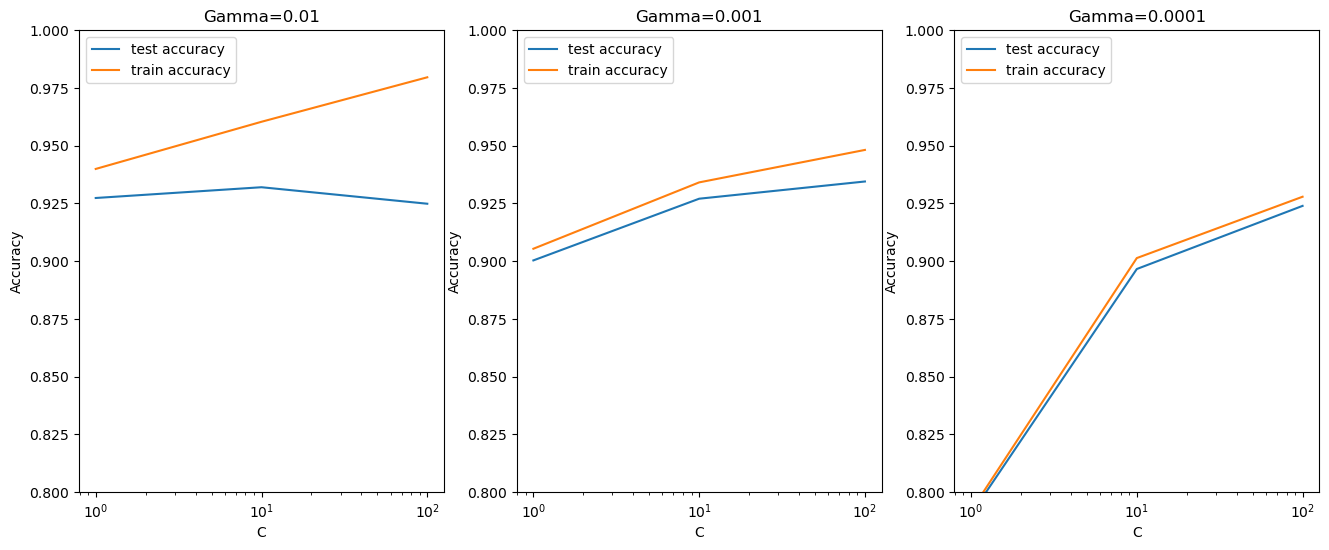

In [37]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


##### This plot reveals some interesting insights:

- High values of gamma lead to overfitting (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99%
- The training score increases with higher gamma, though the test scores are comparable (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite simple non-linear model


In [39]:
# printing the optimal accuracy score and hyperparameter

model_cv.best_score_

0.9344720496894411

In [40]:
model_cv.best_params_

{'C': 100, 'gamma': 0.001}

Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~92.5%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:

- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C
  
We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

##### Building and evaluating the final model

In [43]:
# best parameters
best_params = {'C': 100 , 'gamma':0.0001, 'kernel':'rbf'}

# model building
model = SVC(C= 100, gamma= 0.0001, kernel= 'rbf')

model.fit(X_train, y_train)

SVC(C=100, gamma=0.0001)

In [44]:
#predicting the value of y
y_pred = model.predict(X_test)

In [45]:
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [46]:
# confusion metrics
metrics.confusion_matrix(y_test, y_pred)

array([[775,  36],
       [ 64, 506]], dtype=int64)

In [47]:
#accuracy
metrics.accuracy_score(y_test, y_pred)

0.9275887038377987

In [48]:
#precision
metrics.precision_score(y_test, y_pred)

0.933579335793358

In [49]:
#recall/sensitivity
metrics.recall_score(y_test, y_pred)

0.887719298245614

##### Conculsion

In this project, we developed and optimized a Support Vector Machine (SVM) classifier to detect spam emails using the provided dataset. After preprocessing and feature scaling, we trained the model using the radial basis function (RBF) kernel and fine-tuned it using **GridSearchCV** with cross-validation to identify the best hyperparameters.

The optimal hyperparameters were:

* **C** = 100
* **Gamma** = 0.0001
* **Kernel** = 'rbf'

Using these, the final model achieved the following performance on the test set:

* **Accuracy**: **92.75%**
* **Precision**: **93.35%**
* **Recall (Sensitivity)**: **88.77%**

These results indicate that the model is highly effective at correctly classifying emails as spam or ham. The **high precision** suggests very few legitimate (ham) emails were incorrectly marked as spam, while the **strong recall** shows that most spam emails were successfully detected.

The SVM classifier with optimized hyperparameters is thus well-suited for real-world spam detection tasks, balancing both **false positives and false negatives** effectively.
